In [13]:
# ============================================================
# INSTALL REQUIRED LIBRARIES
# ============================================================
# %pip is a magic command in Jupyter notebooks that installs Python packages
# We need numpy for numerical operations and matplotlib for plotting

%pip install numpy matplotlib

# numpy: Provides powerful array operations and mathematical functions
# matplotlib: Allows us to create plots and visualizations

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


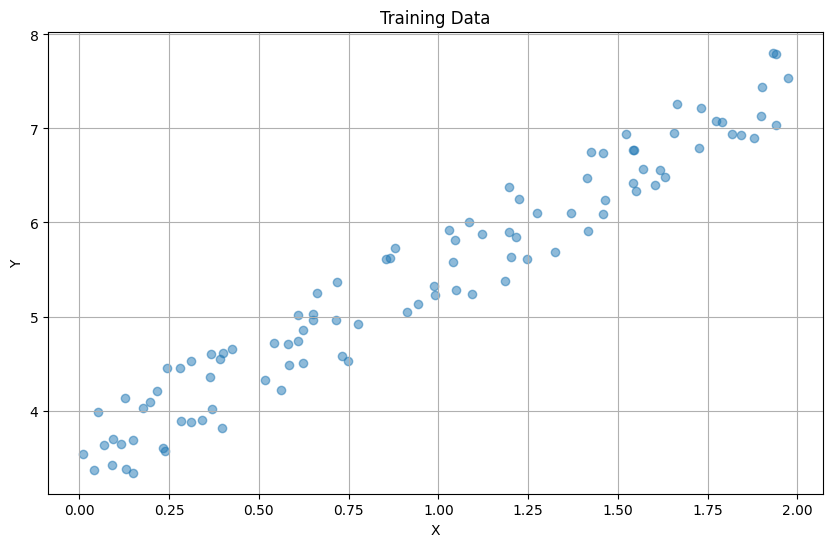

Data shape: x:(100, 1), y:(100, 1)
First 5 examples:
x: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728]
y: [4.52958966 7.43926764 6.24233175 5.90320463 4.53164104]


In [14]:
# ============================================================
# DATA GENERATION AND VISUALIZATION
# ============================================================
# Import necessary libraries
import numpy as np  # For numerical operations and arrays
import matplotlib.pyplot as plt  # For plotting and visualization

# Set random seed for reproducibility
# This ensures we get the same "random" numbers every time we run the code
# Making it easier to debug and compare results
np.random.seed(42)  # 42 is a common choice (Hitchhiker's Guide reference!)

# ============================================================
# Generate Synthetic Training Data
# ============================================================
# We're creating fake data that follows: y = 3 + 2x + noise
# This lets us know the "true" answer and test if our algorithm finds it

m = 100  # Number of training examples (data points)
         # More examples = better learning, but slower computation

# Generate random x values uniformly distributed between 0 and 2
x = 2 * np.random.rand(m, 1)  # np.random.rand(m, 1) gives values in [0, 1)
                               # Multiplying by 2 scales it to [0, 2)
                               # Shape: (100, 1) - 100 rows, 1 column (feature)

# Generate y values following the relationship: y = 3 + 2x + noise
y = 3 + 2*x + np.random.rand(m, 1)  # 3 is the intercept (θ₀)
                                     # 2 is the slope (θ₁)
                                     # np.random.rand adds random noise [0, 1)
                                     # Noise makes it more realistic (real data isn't perfect)
                                     # Shape: (100, 1)

# ============================================================
# Visualize the Data
# ============================================================
plt.figure(figsize=(10, 6))  # Create a new figure, 10 inches wide, 6 inches tall

# Create a scatter plot of our data points
plt.scatter(x, y, alpha=0.5)  # x on horizontal axis, y on vertical axis
                              # alpha=0.5 makes points 50% transparent
                              # Helps see overlapping points

# Add labels and formatting to make the plot readable
plt.xlabel('X')  # Label for horizontal axis
plt.ylabel('Y')  # Label for vertical axis
plt.title('Training Data')  # Title at the top of the plot
plt.grid(True)  # Add gridlines to help read values
plt.show()  # Display the plot (renders it to screen)

# ============================================================
# Print Data Information
# ============================================================
# Print the shape (dimensions) of our data
print(f"Data shape: x:{x.shape}, y:{y.shape}")  # Should show (100, 1) for both

# Print first 5 examples to see what the data looks like
print(f"First 5 examples:")
print(f"x: {x[:5].flatten()}")  # x[:5] gets first 5 rows
                                # .flatten() converts from (5, 1) to (5,) for nicer display
print(f"y: {y[:5].flatten()}")  # Same for y values

In [15]:
# Implementing the analytical solution using the Normal Equation
# Normal Equation: θ = (XᵀX)⁻¹Xᵀy
# This gives us the optimal parameters directly without iteration

# Step 1: Add bias term (intercept) to our feature matrix
# We need to add a column of ones to represent θ₀ (the intercept/bias term)
# Original x shape: (100, 1) - just one feature
# After adding bias: (100, 2) - first column is all 1s, second column is our x values
# This allows our model to be: y = θ₀·1 + θ₁·x (where θ₀ is the y-intercept)

# Breaking down: x_b = np.c_[np.ones((m, 1)), x]
#
# np.ones((m, 1))  -> Creates a (100, 1) column vector filled with 1s
#                     [[1], [1], [1], ..., [1]]
#
# x                -> Our existing feature data, shape (100, 1)
#                     [[x₁], [x₂], [x₃], ..., [x₁₀₀]]
#
# np.c_[..., ...]  -> Column concatenation - sticks arrays side-by-side as columns
#                     Think of it like: [ones_column | x_column]
#
# Result: x_b      -> Shape (100, 2) matrix that looks like:
#                     [[1, x₁  ],
#                      [1, x₂  ],
#                      [1, x₃  ],
#                      ...
#                      [1, x₁₀₀]]
#
# Why add ones? When we multiply x_b by θ = [θ₀, θ₁]:
# [1, x] · [θ₀, θ₁] = 1·θ₀ + x·θ₁ = θ₀ + θ₁·x  (which is y = b + mx!)
x_b = np.c_[np.ones((m, 1)), x]

print(f"x_b shape: {x_b.shape}")  # Should be (100, 2)
print(f"first 3 rows of x_b:\n{x_b[:3]}")  # First column is 1s, second is x values

# Step 2: Apply the Normal Equation to find optimal θ
# Formula breakdown: θ = (XᵀX)⁻¹Xᵀy
#
# x_b.T @ x_b         -> XᵀX: (2, 100) @ (100, 2) = (2, 2) matrix
# np.linalg.inv(...)  -> (XᵀX)⁻¹: inverse of the (2, 2) matrix
# x_b.T @ y           -> Xᵀy: (2, 100) @ (100, 1) = (2, 1) vector
# Final result        -> θ: (2, 1) vector containing [θ₀, θ₁]
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

# Display the results
print("\n" + "="*50)
print("Optimal parameters found using Normal Equation:")
print("="*50)

# theta_best is a (2, 1) array: [[θ₀], [θ₁]]
# theta_best[0][0] accesses the first element (θ₀) - the bias/y-intercept
# theta_best[1][0] accesses the second element (θ₁) - the slope/weight
# .4f formats the number to 4 decimal places (e.g., 3.1234)
print(f"θ₀ (intercept/bias) = {theta_best[0][0]:.4f}")  # The "b" in y = mx + b
print(f"θ₁ (slope/weight)   = {theta_best[1][0]:.4f}")  # The "m" in y = mx + b

# Compare with the true parameters we used to generate the data
# Recall: y = 3 + 2x + noise, so true θ₀=3 and true θ₁=2
print(f"\nTrue parameters were: θ₀ = 3.0, θ₁ = 2.0")

# Show the final learned equation in familiar y = b + mx form
# This is the line our algorithm learned to fit the data
print(f"Our model equation: y = {theta_best[0][0]:.4f} + {theta_best[1][0]:.4f}x")

x_b shape: (100, 2)
first 3 rows of x_b:
[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]

Optimal parameters found using Normal Equation:
θ₀ (intercept/bias) = 3.5136
θ₁ (slope/weight)   = 1.9832

True parameters were: θ₀ = 3.0, θ₁ = 2.0
Our model equation: y = 3.5136 + 1.9832x


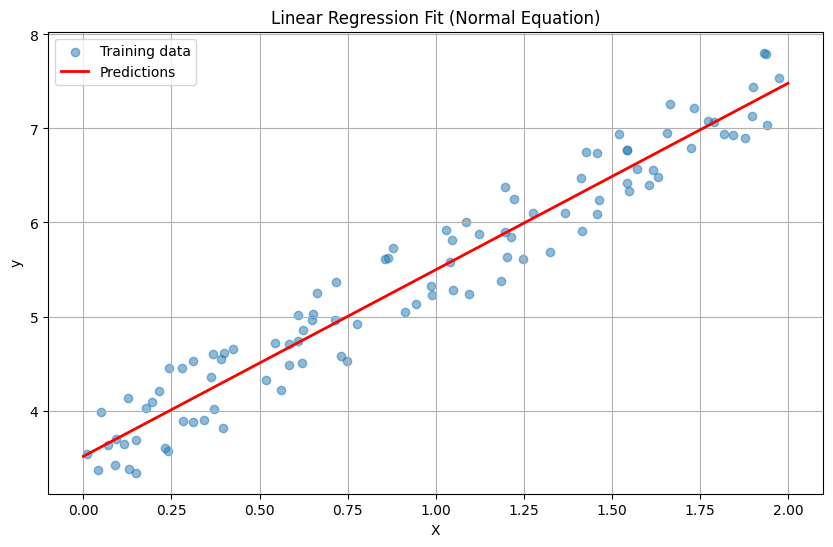

In [16]:
# ============================================================
# VISUALIZING THE FITTED LINE
# ============================================================
# Now that we have our optimal parameters (θ₀ and θ₁),
# let's visualize how well our line fits the training data

# Step 1: Create points for drawing the prediction line
# We want to draw a line from x=0 to x=2 (the range of our data)
# We only need 2 points to draw a straight line
x_new = np.array([[0], [2]])  # Two points: start at x=0, end at x=2
                               # Shape: (2, 1) - two x values as a column vector

# Step 2: Add bias term to our new x values (same as we did for training data)
# Remember: we need the ones column for the intercept term
x_new_b = np.c_[np.ones((2, 1)), x_new]  # Result: [[1, 0], [1, 2]]
                                         # Shape: (2, 2)

# Step 3: Make predictions using our learned model
# Formula: y_predict = x_new_b @ theta_best
# This computes: [[1, 0], [1, 2]] @ [[θ₀], [θ₁]]
# Which gives us: [[θ₀ + 0·θ₁], [θ₀ + 2·θ₁]]
# Or in other words: [y at x=0, y at x=2]
y_predict = x_new_b.dot(theta_best)  # Shape: (2, 1)
                                     # These are the y values on our fitted line

# Step 4: Plot everything
plt.figure(figsize=(10, 6))  # Create a 10x6 inch figure

# Plot the original training data as scatter points
plt.scatter(x, y, alpha=0.5, label='Training data')  
# alpha=0.5 makes points semi-transparent
# label='...' adds this to the legend

# Plot our prediction line connecting the two predicted points
plt.plot(x_new, y_predict, "r-", linewidth=2, label='Predictions')
# "r-" means red solid line
# linewidth=2 makes the line thicker
# This draws a line from (0, y_predict[0]) to (2, y_predict[1])

# Add labels and formatting
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Linear Regression Fit (Normal Equation)')  # Title at the top
plt.legend()  # Show the legend (Training data, Predictions)
plt.grid(True)  # Add gridlines for easier reading
plt.show()  # Display the plot

In [17]:
# ============================================================
# GRADIENT DESCENT FROM SCRATCH
# ============================================================
# Instead of solving directly (Normal Equation), we can use an iterative
# approach called Gradient Descent that gradually improves our parameters

# ------------------------------------------------------------
# Function 1: Compute Cost (Mean Squared Error)
# ------------------------------------------------------------
def compute_cost(x, y, theta):
    """
    Calculate how "wrong" our current predictions are
    
    Cost Function: J(θ) = (1/2m) Σ(ŷᵢ - yᵢ)²
    
    Lower cost = better fit to the data
    Goal of learning: minimize this cost
    
    Args:
        x: Feature matrix with bias term, shape (m, 2)
        y: True output values, shape (m, 1)
        theta: Current parameters [θ₀, θ₁], shape (2, 1)
    
    Returns:
        cost: A single number representing total error
    """
    m = len(y)  # Number of training examples
    
    # Make predictions using current theta: ŷ = X·θ
    predictions = x.dot(theta)  # Shape: (m, 1)
    
    # Calculate errors: how far off each prediction is
    errors = predictions - y  # Shape: (m, 1)
    
    # Compute Mean Squared Error (MSE)
    # We square the errors to penalize large mistakes more
    # Divide by 2m (the 2 makes the derivative cleaner later)
    cost = (1/(2*m)) * np.sum(errors**2)  # Single number
    
    return cost

# ------------------------------------------------------------
# Function 2: Gradient Descent Algorithm
# ------------------------------------------------------------
def gradient_descent(x, y, theta, learning_rate, n_iterations):
    """
    Iteratively adjust theta to minimize the cost function
    
    Update Rule: θ := θ - α · (1/m) · Xᵀ(Xθ - y)
    
    How it works:
    1. Compute predictions with current θ
    2. Calculate how wrong we are (errors)
    3. Compute gradient (direction to move θ)
    4. Update θ by taking a small step in that direction
    5. Repeat!
    
    Args:
        x: Feature matrix with bias, shape (m, 2)
        y: True outputs, shape (m, 1)
        theta: Initial parameters, shape (2, 1)
        learning_rate (α): Step size for each update (0.1 = 10% step)
        n_iterations: How many times to update theta
    
    Returns:
        theta: Final learned parameters
        cost_history: List of costs at each iteration (to track progress)
    """
    m = len(y)  # Number of training examples
    cost_history = []  # Store cost at each iteration to track improvement
    
    # Main learning loop - repeat n_iterations times
    for iteration in range(n_iterations):
        # Step 1: Make predictions with current theta
        predictions = x.dot(theta)  # ŷ = X·θ, shape (m, 1)
        
        # Step 2: Calculate errors (how wrong our predictions are)
        errors = predictions - y  # Shape: (m, 1)
        
        # Step 3: Compute gradient (direction of steepest increase in cost)
        # Gradient = (1/m) · Xᵀ·errors
        # This tells us which direction to move θ to reduce cost
        gradient = (1/m) * x.T.dot(errors)  # Shape: (2, 1)
        
        # Step 4: Update parameters by moving in OPPOSITE direction of gradient
        # We subtract because we want to go DOWN the hill (minimize cost)
        # learning_rate controls how big of a step we take
        theta = theta - learning_rate * gradient
        
        # Step 5: Calculate and store the new cost
        cost = compute_cost(x, y, theta)
        cost_history.append(cost)
        
        # Print progress every 100 iterations to monitor learning
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.4f}")
    
    return theta, cost_history

# ============================================================
# RUN GRADIENT DESCENT
# ============================================================

# Initialize parameters randomly
# Starting with random values instead of zeros helps with learning
theta_initial = np.random.randn(2, 1)  # Random values from standard normal distribution
                                       # Shape: (2, 1) for [θ₀, θ₁]

# Set hyperparameters (values we choose before training)
learning_rate = 0.1  # α = 0.1 means take 10% steps
                     # Too large: might overshoot and diverge
                     # Too small: learning is very slow
                     
n_iterations = 1000  # Number of update steps
                     # More iterations = better convergence (usually)
                     # But diminishing returns after a point

# Display initial state
print("Starting Gradient Descent...")
print(f"Initial theta: {theta_initial.flatten()}")  # Show random starting point
print(f"Initial cost: {compute_cost(x_b, y, theta_initial):.4f}\n")  # How bad is our initial guess?

# Run the gradient descent algorithm!
theta_gd, cost_history = gradient_descent(x_b, y, theta_initial, learning_rate, n_iterations)

# ============================================================
# DISPLAY RESULTS
# ============================================================
print(f"\nFinal parameters (Gradient Descent):")
print(f"θ₀ (intercept) = {theta_gd[0][0]:.4f}")  # Should be close to 3.0
print(f"θ₁ (slope)     = {theta_gd[1][0]:.4f}")  # Should be close to 2.0

# Compare with Normal Equation results
# Both methods should give nearly identical results!
print(f"\nComparison:")
print(f"Normal Equation:  θ₀={theta_best[0][0]:.4f}, θ₁={theta_best[1][0]:.4f}")
print(f"Gradient Descent: θ₀={theta_gd[0][0]:.4f}, θ₁={theta_gd[1][0]:.4f}")

Starting Gradient Descent...
Initial theta: [-0.68002472  0.2322537 ]
Initial cost: 17.6336

Iteration 0: Cost = 11.2310
Iteration 100: Cost = 0.0530
Iteration 200: Cost = 0.0428
Iteration 300: Cost = 0.0425
Iteration 400: Cost = 0.0425
Iteration 500: Cost = 0.0425
Iteration 600: Cost = 0.0425
Iteration 700: Cost = 0.0425
Iteration 800: Cost = 0.0425
Iteration 900: Cost = 0.0425

Final parameters (Gradient Descent):
θ₀ (intercept) = 3.5136
θ₁ (slope)     = 1.9832

Comparison:
Normal Equation:  θ₀=3.5136, θ₁=1.9832
Gradient Descent: θ₀=3.5136, θ₁=1.9832


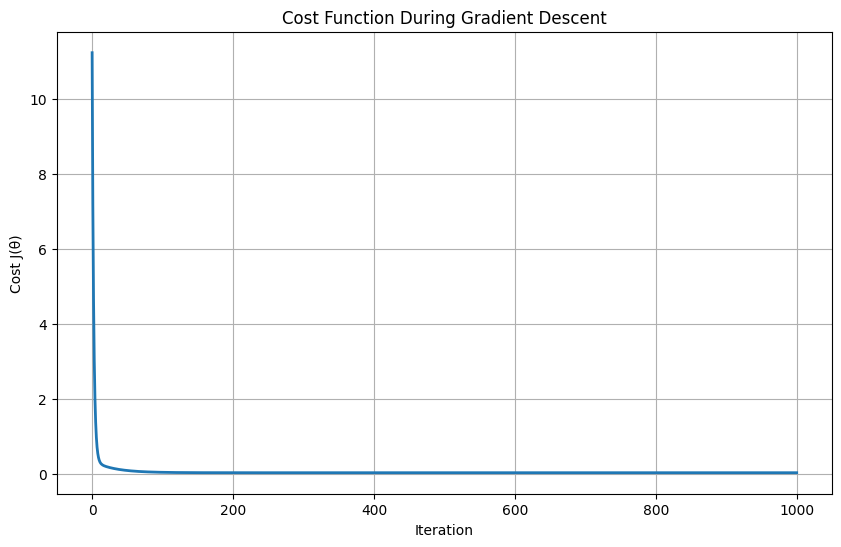

Starting cost: 11.2310
Final cost:    0.0425
Cost reduction: 11.1886


In [18]:
# ============================================================
# VISUALIZE LEARNING PROGRESS (COST OVER TIME)
# ============================================================
# Let's plot how the cost decreased during gradient descent
# This helps us verify that learning worked properly

# Create the plot
plt.figure(figsize=(10, 6))  # Create 10x6 inch figure

# Plot cost vs iteration number
plt.plot(cost_history, linewidth=2)  # cost_history is a list of 1000 costs
                                     # x-axis: iteration number (0, 1, 2, ..., 999)
                                     # y-axis: cost value at that iteration
                                     # linewidth=2 makes the line thicker and easier to see

# Add labels and formatting
plt.xlabel('Iteration')  # Label for x-axis (which iteration we're at)
plt.ylabel('Cost J(θ)')  # Label for y-axis (the cost function value)
                         # J(θ) is standard notation for the cost function
plt.title('Cost Function During Gradient Descent')  # Title
plt.grid(True)  # Add gridlines for easier reading
plt.show()  # Display the plot

# Print numerical summary of the learning process
print(f"Starting cost: {cost_history[0]:.4f}")   # First cost (iteration 0)
                                                  # cost_history[0] gets first element
print(f"Final cost:    {cost_history[-1]:.4f}")  # Last cost (iteration 999)
                                                  # cost_history[-1] gets last element
print(f"Cost reduction: {cost_history[0] - cost_history[-1]:.4f}")  # How much we improved
                                                                     # Larger reduction = more learning

# What to look for in the plot:
# - Cost should START HIGH (bad initial guess)
# - Cost should DECREASE SMOOTHLY (learning is working)
# - Cost should FLATTEN OUT (converged to minimum)
# - If cost increases or oscillates wildly, learning_rate is too high!

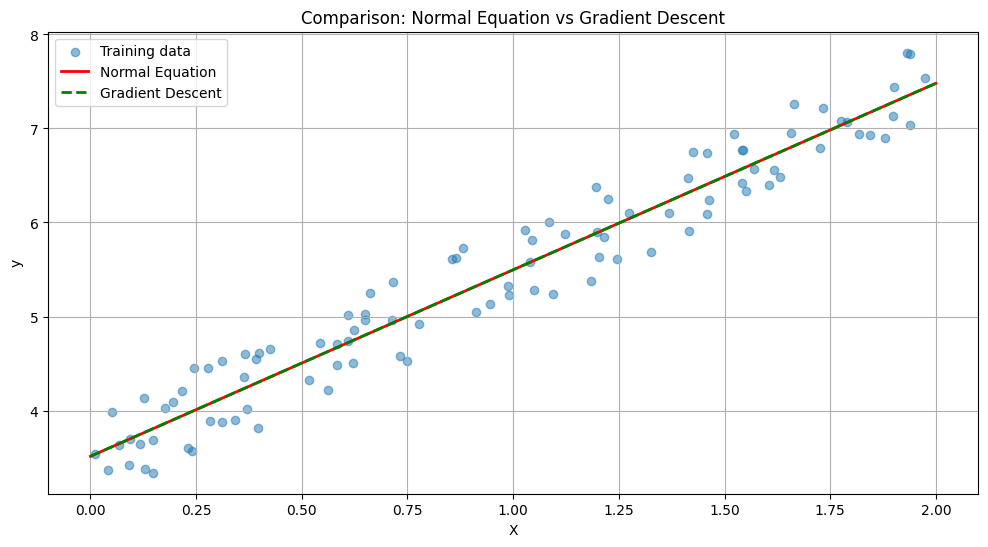

In [19]:
# ============================================================
# COMPARE BOTH METHODS VISUALLY
# ============================================================
# Plot predictions from both Normal Equation and Gradient Descent
# They should be identical (or nearly so)!

# Step 1: Make predictions using both sets of learned parameters
# Remember: x_new_b is [[1, 0], [1, 2]] - our two points for drawing the line

y_predict_normal = x_new_b.dot(theta_best)  # Predictions using Normal Equation θ
                                             # Shape: (2, 1)
                                             # Result: [y at x=0, y at x=2]

y_predict_gd = x_new_b.dot(theta_gd)  # Predictions using Gradient Descent θ
                                       # Shape: (2, 1)
                                       # Should be (almost) identical to y_predict_normal!

# Step 2: Create comparison plot
plt.figure(figsize=(12, 6))  # Create 12x6 inch figure (wider to fit legend)

# Plot the original training data
plt.scatter(x, y, alpha=0.5, label='Training data')
# alpha=0.5 makes points semi-transparent
# label adds this to the legend

# Plot the Normal Equation prediction line
plt.plot(x_new, y_predict_normal, "r-", linewidth=2, label='Normal Equation')
# "r-" = red solid line
# linewidth=2 makes it easier to see
# Draws line from (0, y_predict_normal[0]) to (2, y_predict_normal[1])

# Plot the Gradient Descent prediction line
plt.plot(x_new, y_predict_gd, "g--", linewidth=2, label='Gradient Descent')
# "g--" = green dashed line
# linewidth=2 makes it visible
# The dashed style helps distinguish it from the Normal Equation line
# (Though in practice they'll overlap perfectly!)

# Add labels and formatting
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Comparison: Normal Equation vs Gradient Descent')  # Title
plt.legend()  # Show legend to identify which line is which
              # Will show: Training data, Normal Equation (red), Gradient Descent (green)
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# What to observe:
# - The two lines should OVERLAP PERFECTLY (or nearly so)
# - Both methods find the same optimal parameters
# - Normal Equation: Direct calculation (fast, exact)
# - Gradient Descent: Iterative approach (slower, but scales better for large datasets)

Experiment 1: Learning Rate Too Large
Iteration 0: Cost = 20.2722


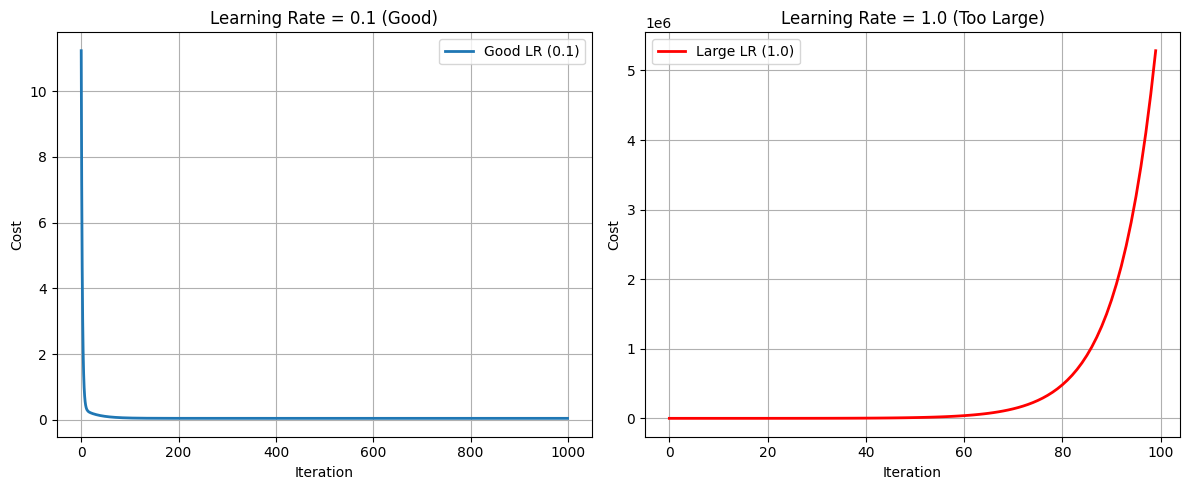


Good LR final cost: 0.0425
Large LR final cost: 5283789.8842


In [20]:
# ============================================================
# EXPERIMENT: WHAT HAPPENS WITH A BAD LEARNING RATE?
# ============================================================
# Let's see what happens when we choose a learning rate that's too large
# This demonstrates the importance of choosing good hyperparameters

print("Experiment 1: Learning Rate Too Large")
print("=" * 50)

# Initialize new random starting point for fair comparison
theta_initial = np.random.randn(2, 1)  # Random starting parameters
                                       # Shape: (2, 1)

# Set learning rate MUCH TOO LARGE
learning_rate_large = 1.0  # α = 1.0 is way too large for this problem!
                          # With large learning rates, gradient descent "overshoots"
                          # Instead of descending smoothly, it bounces around wildly

n_iterations = 100  # Run for only 100 iterations to see what happens

# Run gradient descent with the bad learning rate
theta_diverge, cost_history_diverge = gradient_descent(
    x_b,                    # Our training data with bias term
    y,                      # Our target values
    theta_initial,          # Random starting point
    learning_rate_large,    # The problematically large learning rate
    n_iterations            # Number of iterations
)
# Note: This will likely show cost increasing or oscillating wildly!

# ============================================================
# VISUALIZE THE DIFFERENCE
# ============================================================
# Create side-by-side plots to compare good vs bad learning rates

plt.figure(figsize=(12, 5))  # Create 12x5 inch figure for two subplots

# Left subplot: Good learning rate (from earlier)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1 (left)
plt.plot(cost_history, label='Good LR (0.1)', linewidth=2)
# cost_history is from our earlier successful training
# This should show smooth, steady decrease

plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Learning Rate = 0.1 (Good)')  # Title for this subplot
plt.grid(True)   # Add gridlines
plt.legend()     # Show legend

# Right subplot: Bad learning rate (current experiment)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2 (right)
plt.plot(cost_history_diverge, label='Large LR (1.0)', linewidth=2, color='red')
# cost_history_diverge is from our experiment with large learning rate
# This should show wild oscillations or increasing cost (divergence)
# Red color emphasizes this is the "bad" example

plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Learning Rate = 1.0 (Too Large)')  # Title for this subplot
plt.grid(True)   # Add gridlines
plt.legend()     # Show legend

plt.tight_layout()  # Automatically adjust spacing between subplots
                    # Prevents titles/labels from overlapping
plt.show()  # Display both plots

# ============================================================
# PRINT COMPARISON
# ============================================================
# Compare final costs to see the dramatic difference

print(f"\nGood LR final cost: {cost_history[-1]:.4f}")  # Should be low (good fit)
                                                         # cost_history[-1] = last element
print(f"Large LR final cost: {cost_history_diverge[-1]:.4f}")  # Likely high (poor fit)
                                                                # Shows divergence!

# Key Takeaway:
# - Left plot: Smooth decrease → Learning rate is just right
# - Right plot: Wild jumps or increase → Learning rate is too large
# - This is why tuning hyperparameters is critical in machine learning!
# - Too large: diverges (overshoots the minimum)
# - Too small: converges very slowly (takes forever)
# - Just right: smooth, fast convergence


Experiment 2: Learning Rate Too Small
Iteration 0: Cost = 5.1245
Iteration 100: Cost = 3.4051
Iteration 200: Cost = 2.2678
Iteration 300: Cost = 1.5156
Iteration 400: Cost = 1.0181
Iteration 500: Cost = 0.6890
Iteration 600: Cost = 0.4713
Iteration 700: Cost = 0.3273
Iteration 800: Cost = 0.2320
Iteration 900: Cost = 0.1689


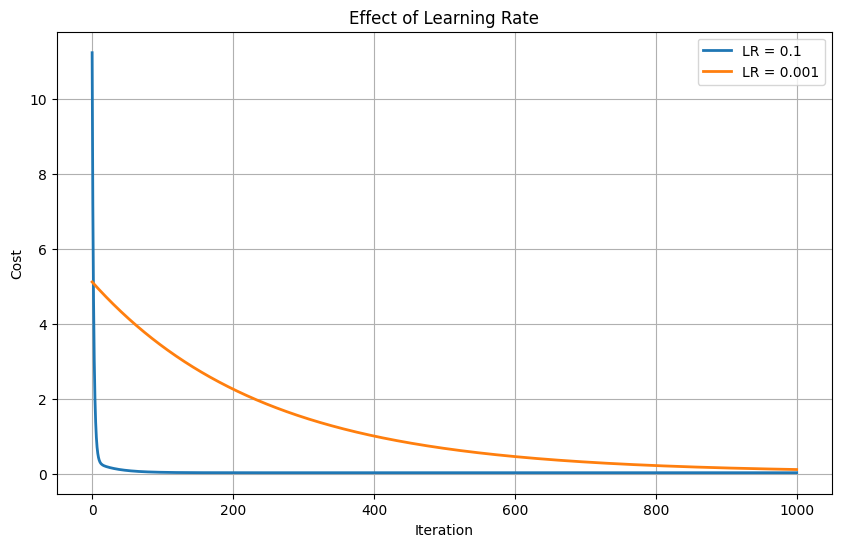


Good LR (0.1) - Final cost: 0.0425
Small LR (0.001) - Final cost: 0.1275

Good LR reached cost 0.0425 in 1000 iterations
Small LR only reached 0.1275 in 1000 iterations


In [21]:
# ============================================================
# EXPERIMENT 2: LEARNING RATE TOO SMALL
# ============================================================
# Now let's see what happens when the learning rate is too small
# This is the opposite problem from Experiment 1

print("\nExperiment 2: Learning Rate Too Small")
print("=" * 50)

# Initialize new random starting point
theta_initial = np.random.randn(2, 1)  # Random starting parameters
                                       # Shape: (2, 1)

# Set learning rate VERY SMALL
learning_rate_small = 0.001  # α = 0.001 is too small (100x smaller than optimal)
                            # With tiny learning rates, gradient descent takes baby steps
                            # Learning is correct but VERY SLOW

n_iterations = 1000  # Same 1000 iterations as before

# Run gradient descent with the small learning rate
theta_slow, cost_history_slow = gradient_descent(
    x_b,                    # Our training data with bias term
    y,                      # Our target values
    theta_initial,          # Random starting point
    learning_rate_small,    # The very small learning rate
    n_iterations            # Number of iterations
)
# This will converge, but MUCH slower than with good learning rate

# ============================================================
# COMPARE GOOD VS TOO SMALL LEARNING RATE
# ============================================================
# Plot both learning curves on same graph to compare

plt.figure(figsize=(10, 6))  # Create 10x6 inch figure

# Plot the good learning rate (0.1) from earlier
plt.plot(cost_history, label='LR = 0.1', linewidth=2)
# This should show quick, smooth descent to minimum

# Plot the small learning rate (0.001)
plt.plot(cost_history_slow, label='LR = 0.001', linewidth=2)
# This should show slow, gradual descent
# After 1000 iterations, it might not even reach the minimum yet!

# Add labels and formatting
plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Effect of Learning Rate')  # Title
plt.legend()  # Show which line is which
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# ============================================================
# PRINT COMPARISON
# ============================================================
print(f"\nGood LR (0.1) - Final cost: {cost_history[-1]:.4f}")
# Should be very low (converged)

print(f"Small LR (0.001) - Final cost: {cost_history_slow[-1]:.4f}")
# Likely still higher (hasn't fully converged yet)

print(f"\nGood LR reached cost {cost_history[-1]:.4f} in 1000 iterations")
print(f"Small LR only reached {cost_history_slow[-1]:.4f} in 1000 iterations")

# Key Takeaway:
# - Too LARGE learning rate: Diverges (bounces around, gets worse)
# - Too SMALL learning rate: Converges slowly (correct direction, but too slow)
# - Just right (Goldilocks): Fast and smooth convergence
# - In practice: Start with common values (0.1, 0.01) and adjust based on cost plot


Experiment 3: Multiple Features
Data shape: X=(100, 3), y=(100, 1)
True parameters: θ₀=4, θ₁=3, θ₂=2
Iteration 0: Cost = 7.8121
Iteration 100: Cost = 0.4156
Iteration 200: Cost = 0.4154
Iteration 300: Cost = 0.4154
Iteration 400: Cost = 0.4154
Iteration 500: Cost = 0.4154
Iteration 600: Cost = 0.4154
Iteration 700: Cost = 0.4154
Iteration 800: Cost = 0.4154
Iteration 900: Cost = 0.4154

Normal Equation:
θ₀=3.8353, θ₁=3.1811, θ₂=2.0207

Gradient Descent:
θ₀=3.8353, θ₁=3.1811, θ₂=2.0207


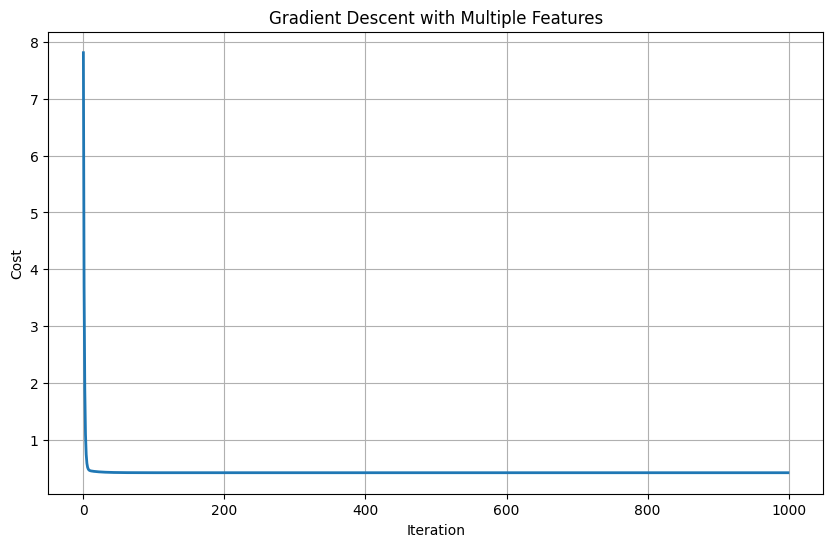

In [22]:
# ============================================================
# EXPERIMENT 3: MULTIPLE FEATURES (MULTIVARIATE LINEAR REGRESSION)
# ============================================================
# So far we've only used ONE feature (x)
# In real-world problems, we often have MULTIPLE features
# Example: predicting house price using size, bedrooms, age, etc.

print("\nExperiment 3: Multiple Features")
print("=" * 50)

# ============================================================
# Generate Synthetic Data with 2 Features
# ============================================================
# True relationship: y = 4 + 3*x₁ + 2*x₂ + noise
# where:
#   - 4 is the intercept (θ₀)
#   - 3 is the weight for feature 1 (θ₁)
#   - 2 is the weight for feature 2 (θ₂)

m = 100  # Number of training examples

# Generate 2 features
X_multi = 2 * np.random.rand(m, 2)  # Shape: (100, 2)
                                    # Each row is one example with 2 features
                                    # Column 0: x₁ values (0 to 2)
                                    # Column 1: x₂ values (0 to 2)

# Generate y values using the true relationship
y_multi = 4 + 3*X_multi[:, 0] + 2*X_multi[:, 1] + np.random.randn(m)
# X_multi[:, 0] gets all values from column 0 (feature 1)
# X_multi[:, 1] gets all values from column 1 (feature 2)
# np.random.randn(m) adds Gaussian noise (mean=0, std=1)

y_multi = y_multi.reshape(-1, 1)  # Reshape from (100,) to (100, 1)
                                  # Makes it a column vector for matrix operations

# Add bias term (column of ones)
X_multi_b = np.c_[np.ones((m, 1)), X_multi]  # Shape: (100, 3)
                                             # Column 0: all 1s (for θ₀)
                                             # Column 1: x₁ values (for θ₁)
                                             # Column 2: x₂ values (for θ₂)

print(f"Data shape: X={X_multi_b.shape}, y={y_multi.shape}")
print(f"True parameters: θ₀=4, θ₁=3, θ₂=2")

# ============================================================
# Solve Using Normal Equation
# ============================================================
# Same formula as before: θ = (XᵀX)⁻¹Xᵀy
# But now θ has 3 elements instead of 2!

theta_multi_normal = np.linalg.inv(X_multi_b.T.dot(X_multi_b)).dot(X_multi_b.T).dot(y_multi)
# Result shape: (3, 1) containing [θ₀, θ₁, θ₂]

# ============================================================
# Solve Using Gradient Descent
# ============================================================
theta_initial = np.random.randn(3, 1)  # Now we need 3 parameters!
                                       # Shape: (3, 1) for [θ₀, θ₁, θ₂]

learning_rate = 0.1  # Same learning rate as before
n_iterations = 1000  # Same number of iterations

# Run gradient descent
# Our gradient_descent function works for ANY number of features!
theta_multi_gd, cost_history_multi = gradient_descent(
    X_multi_b,       # Training data with 3 columns (bias + 2 features)
    y_multi,         # Target values
    theta_initial,   # Random starting point with 3 parameters
    learning_rate,   # Learning rate
    n_iterations     # Number of iterations
)

# ============================================================
# DISPLAY RESULTS
# ============================================================
print(f"\nNormal Equation:")
print(f"θ₀={theta_multi_normal[0][0]:.4f}, θ₁={theta_multi_normal[1][0]:.4f}, θ₂={theta_multi_normal[2][0]:.4f}")
# Should be close to: θ₀=4.0, θ₁=3.0, θ₂=2.0

print(f"\nGradient Descent:")
print(f"θ₀={theta_multi_gd[0][0]:.4f}, θ₁={theta_multi_gd[1][0]:.4f}, θ₂={theta_multi_gd[2][0]:.4f}")
# Should match Normal Equation results (and be close to true values)

# ============================================================
# Plot Learning Curve
# ============================================================
plt.figure(figsize=(10, 6))  # Create figure
plt.plot(cost_history_multi, linewidth=2)  # Plot cost vs iteration
plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Gradient Descent with Multiple Features')  # Title
plt.grid(True)  # Add gridlines
plt.show()  # Display plot

# Key Takeaway:
# - Linear regression works with ANY number of features!
# - The math is the same, just with higher-dimensional matrices
# - Our model becomes: y = θ₀ + θ₁·x₁ + θ₂·x₂ + ... + θₙ·xₙ
# - Both Normal Equation and Gradient Descent scale to multiple features


Experiment 4: Feature Scaling
Features have very different scales:
Feature 1 range: [2.0, 96.9]
Feature 2 range: [0.0, 1.0]

Running gradient descent WITHOUT feature scaling...
Using very small learning rate: 0.0001
Iteration 0: Cost = 4780.9090
Iteration 100: Cost = 8.9362
Iteration 200: Cost = 8.8837
Iteration 300: Cost = 8.8316
Iteration 400: Cost = 8.7799
Iteration 500: Cost = 8.7286
Iteration 600: Cost = 8.6778
Iteration 700: Cost = 8.6273
Iteration 800: Cost = 8.5772
Iteration 900: Cost = 8.5275

Running gradient descent WITH feature scaling...
Using normal learning rate: 0.1
Iteration 0: Cost = 4225.8854
Iteration 100: Cost = 2.2362
Iteration 200: Cost = 2.2362
Iteration 300: Cost = 2.2362
Iteration 400: Cost = 2.2362
Iteration 500: Cost = 2.2362
Iteration 600: Cost = 2.2362
Iteration 700: Cost = 2.2362
Iteration 800: Cost = 2.2362
Iteration 900: Cost = 2.2362


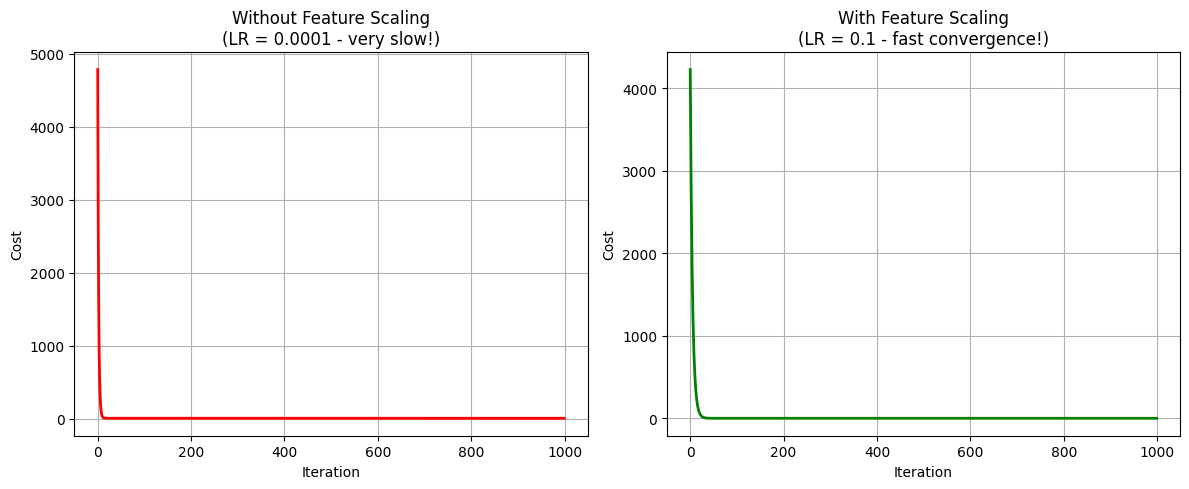


RESULTS:
Without scaling - Final cost: 8.4787
                  Learning rate: 0.0001 (VERY SMALL)

With scaling    - Final cost: 2.2362
                  Learning rate: 0.1 (NORMAL)

With feature scaling, we can use a learning rate 1000x LARGER!
This means MUCH faster convergence!


In [23]:
# ============================================================
# EXPERIMENT 4: FEATURE SCALING (VERY IMPORTANT!)
# ============================================================
# When features have very different scales (e.g., one is 0-1, another is 0-100),
# gradient descent has trouble converging efficiently
# This demonstrates WHY feature scaling is crucial in practice

print("\nExperiment 4: Feature Scaling")
print("=" * 50)

# ============================================================
# Create Data with VERY DIFFERENT SCALES
# ============================================================
m = 100  # Number of examples

# Generate 2 features with VASTLY different ranges
X_unscaled = np.random.rand(m, 2)  # Start with values between 0 and 1

X_unscaled[:, 0] = X_unscaled[:, 0] * 100  # Feature 1: Scale to 0-100 (LARGE)
                                           # [:, 0] selects all rows, column 0
                                           # This feature has large values

X_unscaled[:, 1] = X_unscaled[:, 1] * 1    # Feature 2: Keep at 0-1 (SMALL)
                                           # [:, 1] selects all rows, column 1
                                           # This feature has small values

# Generate y values
# True relationship: y = 3 + 2*x₁ + 5*x₂ + noise
y_scale = 3 + 2*X_unscaled[:, 0] + 5*X_unscaled[:, 1] + np.random.randn(m)*2
y_scale = y_scale.reshape(-1, 1)  # Reshape to column vector

# Add bias term
X_unscaled_b = np.c_[np.ones((m, 1)), X_unscaled]  # Shape: (100, 3)

print("Features have very different scales:")
print(f"Feature 1 range: [{X_unscaled[:, 0].min():.1f}, {X_unscaled[:, 0].max():.1f}]")
print(f"Feature 2 range: [{X_unscaled[:, 1].min():.1f}, {X_unscaled[:, 1].max():.1f}]")
# Feature 1 is ~100x larger than Feature 2!

# ============================================================
# Try Gradient Descent WITHOUT Feature Scaling
# ============================================================
# When features have different scales, gradient descent struggles because:
# - Large features dominate the gradient
# - Small learning rates needed to avoid divergence
# - Convergence is very slow or unstable

theta_init = np.random.randn(3, 1)  # Random starting point
learning_rate_unscaled = 0.0001  # VERY small LR to prevent overflow
                                 # This is 1000x smaller than our usual 0.1!
                                 # We NEED such a tiny LR because of unscaled features
n_iterations = 1000

print("\nRunning gradient descent WITHOUT feature scaling...")
print(f"Using very small learning rate: {learning_rate_unscaled}")

theta_unscaled, cost_unscaled = gradient_descent(
    X_unscaled_b,          # Unscaled data (features have different ranges)
    y_scale,               # Target values
    theta_init,            # Starting parameters
    learning_rate_unscaled,  # VERY small learning rate
    n_iterations
)

# ============================================================
# Now WITH Feature Scaling (Standardization)
# ============================================================
# Standardization formula: x_scaled = (x - mean) / std
# This transforms features to have:
#   - Mean = 0
#   - Standard deviation = 1
# Now all features are on the same scale!

X_scaled = X_unscaled.copy()  # Make a copy to preserve original

# Standardize feature 1
X_scaled[:, 0] = (X_scaled[:, 0] - X_scaled[:, 0].mean()) / X_scaled[:, 0].std()
# Subtract mean (centers around 0)
# Divide by std (scales to unit variance)

# Standardize feature 2
X_scaled[:, 1] = (X_scaled[:, 1] - X_scaled[:, 1].mean()) / X_scaled[:, 1].std()
# Now both features have mean=0, std=1

X_scaled_b = np.c_[np.ones((m, 1)), X_scaled]  # Add bias term

# Run gradient descent with MUCH LARGER learning rate
# Because features are scaled, we can use a normal learning rate!
theta_init = np.random.randn(3, 1)  # New random starting point
learning_rate_scaled = 0.1  # Normal learning rate (1000x larger!)
                            # This works fine with scaled features

print(f"\nRunning gradient descent WITH feature scaling...")
print(f"Using normal learning rate: {learning_rate_scaled}")

theta_scaled, cost_scaled = gradient_descent(
    X_scaled_b,          # Scaled data (all features have similar ranges)
    y_scale,             # Same target values
    theta_init,          # Starting parameters
    learning_rate_scaled,  # Normal learning rate works fine now!
    n_iterations
)
# This should converge much better and faster!

# ============================================================
# COMPARE RESULTS VISUALLY
# ============================================================
plt.figure(figsize=(12, 5))  # Create figure for side-by-side plots

# Left: Without feature scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.plot(cost_unscaled, linewidth=2, color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Without Feature Scaling\n(LR = 0.0001 - very slow!)')
plt.grid(True)
# This plot will show:
# - VERY slow convergence (because tiny learning rate)
# - Still might not reach minimum after 1000 iterations
# - We HAD to use tiny LR to avoid overflow

# Right: With feature scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.plot(cost_scaled, linewidth=2, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('With Feature Scaling\n(LR = 0.1 - fast convergence!)')
plt.grid(True)
# This plot should show:
# - Smooth, FAST convergence
# - Reaches minimum quickly
# - We can use 1000x larger LR safely!

plt.tight_layout()  # Adjust spacing
plt.show()

# ============================================================
# PRINT COMPARISON
# ============================================================
print(f"\n" + "="*50)
print("RESULTS:")
print("="*50)
print(f"Without scaling - Final cost: {cost_unscaled[-1]:.4f}")
print(f"                  Learning rate: {learning_rate_unscaled} (VERY SMALL)")
# Higher cost because learning is too slow

print(f"\nWith scaling    - Final cost: {cost_scaled[-1]:.4f}")
print(f"                  Learning rate: {learning_rate_scaled} (NORMAL)")
# Lower cost because learning worked well

print(f"\nWith feature scaling, we can use a learning rate {learning_rate_scaled/learning_rate_unscaled:.0f}x LARGER!")
print("This means MUCH faster convergence!")

# Key Takeaways:
# - ALWAYS scale features when using gradient descent!
# - Without scaling:
#   * Need TINY learning rates (very slow)
#   * Risk of numerical overflow
#   * Poor convergence
# - With scaling:
#   * Can use NORMAL learning rates (fast)
#   * Stable training
#   * Excellent convergence
# 
# Common scaling methods:
#   1. Standardization: (x - mean) / std  → mean=0, std=1
#   2. Min-Max scaling: (x - min) / (max - min)  → range [0, 1]
# 
# - Normal Equation doesn't need feature scaling (direct calculation)
# - But gradient descent absolutely does for features with different scales!